# Convolutional Neural Networks - Image Classification

### 1. INITIALIZATION

In [6]:
# Import necessary libraries and modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

#https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/

In [7]:
# Check tensorflow version
tf.__version__

'2.16.1'

### 2. LOADING DATASET

The dataset used is CIFAR-10, it contains 60k (50k training and 10k testing) coloured images with 10 classes.

In [8]:
# Loading the dataset from keras library
from keras.datasets import cifar10 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [9]:
# Check imported dataset details
print("X Train: {} \nX Test: {} \ny Train: {} \ny test: {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X Train: (50000, 32, 32, 3) 
X Test: (10000, 32, 32, 3) 
y Train: (50000, 1) 
y test: (10000, 1)


### 3. IMAGE PREPROCESSING

In [10]:
# Convert target data to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

Implementing image transformations to avoid over fitting

In [11]:
# Initialize ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

# Generate augmented training data batches
train_generator = train_datagen.flow(
    X_train, y_train,
    batch_size=32
)

In [12]:
# Initialize ImageDataGenerator for testing data
test_datagen = ImageDataGenerator(
    rescale = 1./255
)

# Generate augmented testing data batches
test_generator = test_datagen.flow(
    X_test, y_test,
    batch_size=32
)

### 4. BUILDING CNN MODEL

In [13]:
# Initializing cnn model
cnn = tf.keras.models.Sequential()

In [14]:
# Add input layer and first convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=[32, 32, 3]))

c:\Users\SinanWannous\anaconda3\envs\dl_course\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [15]:
# Add first pooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [16]:
# Add second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))

In [17]:
# Add second pooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [18]:
# Add flattening layer
cnn.add(tf.keras.layers.Flatten())

In [19]:
# Add fully connected layer
cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))

In [20]:
# Add output layer
cnn.add(tf.keras.layers.Dense(units=10, activation="softmax"))

### 5. TRAINING CNN MODEL

In [21]:
# Compiling cnn model
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", "precision", "recall", "f1_score"])

In [22]:
# Training cnn model
# cnn.fit(x = train_generator, validation_data=test_generator, epochs=10)

In [23]:
# Train the model using the generated and augmented data
history = cnn.fit(
    train_generator,
    epochs=25,
    validation_data=test_generator
)

Epoch 1/25
   7/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.1015 - f1_score: 0.0520 - loss: 2.3093 - precision: 0.0000e+00 - recall: 0.0000e+00 

c:\Users\SinanWannous\anaconda3\envs\dl_course\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.3699 - f1_score: 0.3609 - loss: 1.7259 - precision: 0.6274 - recall: 0.1245 - val_accuracy: 0.5652 - val_f1_score: 0.5581 - val_loss: 1.2117 - val_precision: 0.7240 - val_recall: 0.3969
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5588 - f1_score: 0.5552 - loss: 1.2456 - precision: 0.7290 - recall: 0.3703 - val_accuracy: 0.6134 - val_f1_score: 0.6055 - val_loss: 1.0944 - val_precision: 0.7610 - val_recall: 0.4529
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6056 - f1_score: 0.6031 - loss: 1.1241 - precision: 0.7547 - recall: 0.4520 - val_accuracy: 0.6265 - val_f1_score: 0.6216 - val_loss: 1.0612 - val_precision: 0.7527 - val_recall: 0.4896
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6334 - f1_score: 0.6314 - loss: 1.0391 - precision: 0.7657 - recall: 0.4993 - val_accuracy: 0.6497 - val_f1_score: 0.6452 - val_loss: 1.0010 - val_precision: 0.7511 - val_recall

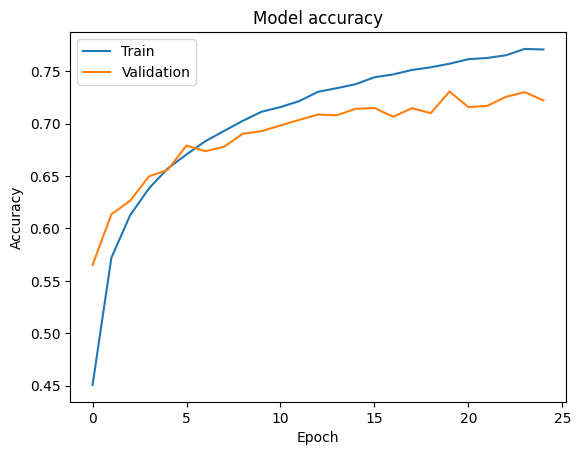

In [24]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()